In [5]:
from google.colab import files
files.upload()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the loan approval dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Basic dataset checks
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns}")

# Check class balance for the target variable
print("Class balance (approved):")
print(df['approved'].value_counts(normalize=True))

# Preview the first few rows of the dataset
df.head()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv
Dataset shape: (1000, 4)
Columns: Index(['income_k', 'debt_to_income', 'credit_score', 'approved'], dtype='object')
Class balance (approved):
approved
0    0.507
1    0.493
Name: proportion, dtype: float64


,income_k,debt_to_income,credit_score,approved
0,65.5,0.341,585,0
1,41.3,0.241,654,0
2,73.5,0.573,564,0
3,76.9,0.348,665,1
4,24.9,0.349,619,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income_k        1000 non-null   float64
 1   debt_to_income  1000 non-null   float64
 2   credit_score    1000 non-null   int64  
 3   approved        1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


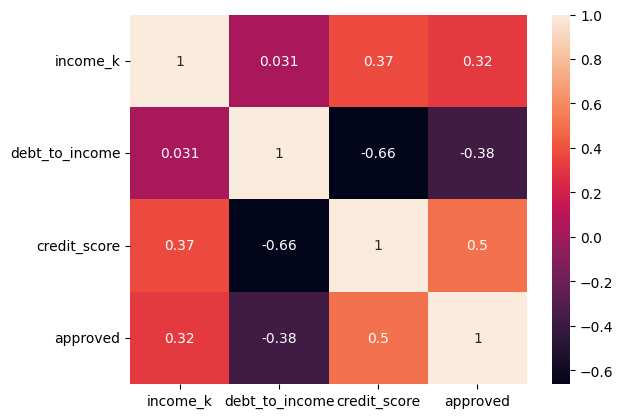

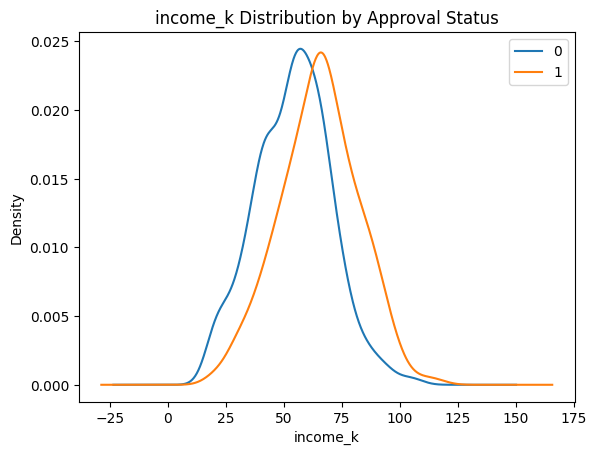

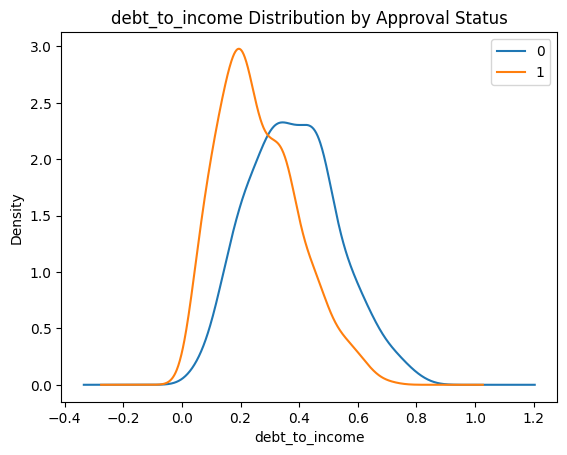

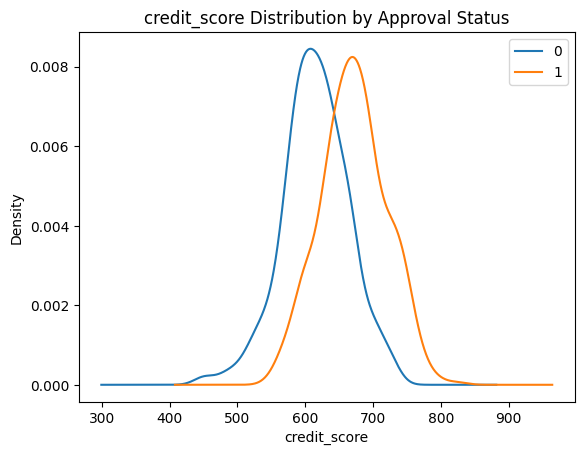

In [2]:
# Display dataset structure and data types
df.info()

# Check for missing values in each column
df.isnull().sum()

# Count the number of unique values per column
df.nunique()

# Compute correlation matrix between features
df.corr()

# Visualize feature correlations
sns.heatmap(df.corr(), annot=True)
plt.show()

# Exploratory Data Analysis (EDA): Feature Distributions by Class

# Define input feature columns
X_cols = ['income_k', 'debt_to_income', 'credit_score']

# Plot distributions of each feature grouped by approval status
for feature_col in X_cols:
    df.groupby('approved')[feature_col].plot(
        kind='kde',
        legend=True,
        title=f'{feature_col} Distribution by Approval Status'
    )
    plt.xlabel(feature_col)
    plt.show()

In [3]:
# Train / Test Split

# Separate input features (X) and target label (y)
X = df[X_cols]
y = df['approved']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify split sizes and class balance
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')
print(f'Train approved rate: {y_train.mean().round(2)}')
print(f'Test approved rate: {y_test.mean().round(2)}')

Train shape: (800, 3)
Test shape: (200, 3)
Train approved rate: 0.49
Test approved rate: 0.5


In [6]:
# Feature Scaling

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

print('Scaling complete!')

Scaling complete!


In [7]:
# Baseline Model: Logistic Regression

# Initialize the logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Generate predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

In [8]:
## Hyperparameter Tuning: Logistic Regression

# Define hyperparameter search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']
}

# Perform grid search with cross-validation on training data
grid = GridSearchCV(
    LogisticRegression(max_iter=3000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

# Extract the best-performing model
print("Best hyperparameters:", grid.best_params_)
best_model = grid.best_estimator_

Best hyperparameters: {'C': 0.001, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [9]:
# Model Evaluation

# Generate predictions on the test set using the tuned model
y_pred = best_model.predict(X_test_scaled)

# Evaluate model performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.74

Confusion Matrix:
[[77 24]
 [28 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       101
           1       0.75      0.72      0.73        99

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



A logistic regression classifier was selected for this loan approval task due to its suitability for binary classification problems and its ability to model linear decision boundaries. Prior to training, the dataset was split into training and testing sets to ensure fair evaluation on unseen data. Feature scaling was applied using standardization so that all input variables were on a comparable scale, which helps improve model convergence and performance. Hyperparameter tuning was performed using cross-validation to identify the best regularization strength and solver. The final model was evaluated on the test set to assess its classification performance.